<a href="https://colab.research.google.com/github/Neeshi14/Thyorid-Prediction/blob/main/Copy_of_Thyroiddataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thyroid Prediction Model**

# Use thyroid dataset

The dataset are downloaded in the kaggle platform.In that the dataset name is "thyroid_cancer_risk_data.csv" are downloaded .

There are 17 features



Here’s a brief one-line explanation for each feature of dataset:

Patient_ID -> Unique identifier for each patient


Age -> Patient’s age in years


Gender -> Patient’s gender (Male/Female)


Country -> Patient’s country of residence


Ethnicity -> Patient’s ethnic background (Caucasian, Asian, etc)


Family_History -> Whether the patient has a family history of thyroid cance
(Yes/No)


Radiation_Exposure -> Whether the patient has been exposed to radiation (Yes/No)


Iodine_Deficiency -> Whether the patient has iodine deficiency (Yes/No)


Smoking -> Whether the patient is a smoker (Yes/No)


Obesity -> Whether the patient is classified as obese (Yes/No)


Diabetes -> Whether the patient has diabetes (Yes/No)


TSH_Level -> Level of thyroid-stimulating hormone (TSH) in blood (mIU/L)


T3_Level -> Level of triiodothyronine (T3) hormone in blood (nmol/L)


T4_Level -> Level of thyroxine (T4) hormone in blood (nmol/L)


Nodule_Size -> Size of thyroid nodules (cm)


Thyroid_Cancer_Risk -> Assessed risk level (Low, Medium, High)


Diagnosis -> Final thyroid diagnosis (Benign, Malignant)

Import library

In [ ]:
import pandas as pd
import numpy as np

Import the dataset

In [ ]:
df=pd.read_csv("thyroid_cancer_risk_data.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
#Get summary
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [ ]:
#Check for missing values
df.isnull().sum()
#Here are no missing value

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set style for better visualization
sns.set_style("whitegrid")

In [ ]:
# List of numerical and categorical columns
numerical_features = ['TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
categorical_features = ['Gender', 'Family_History', 'Thyroid_Cancer_Risk']


In [ ]:
# Univariate Analysis
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

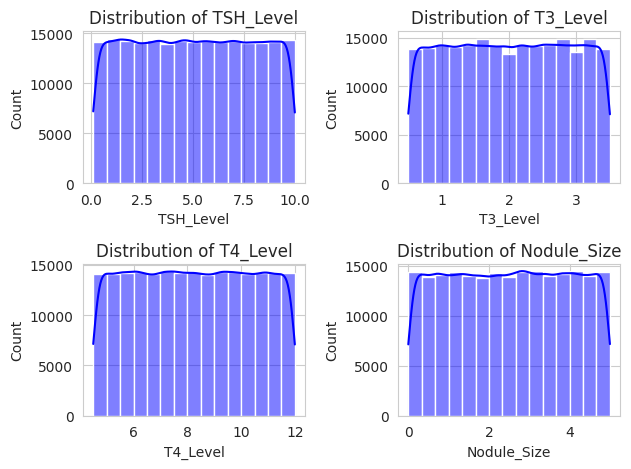

In [ ]:
# Histograms for numerical features
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)#creates a 2x2 grid, meaning there will be 4 subplots arranged in 2 rows and 2 columns.
    sns.histplot(df[col], kde=True, bins=15, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

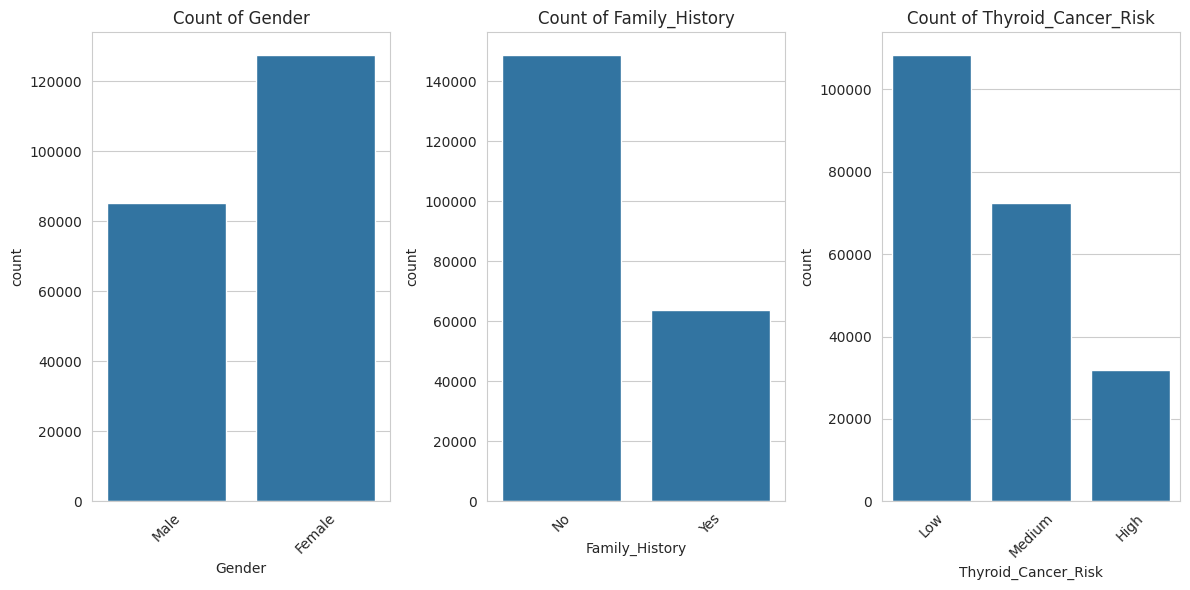

In [ ]:
# Bar charts for categorical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

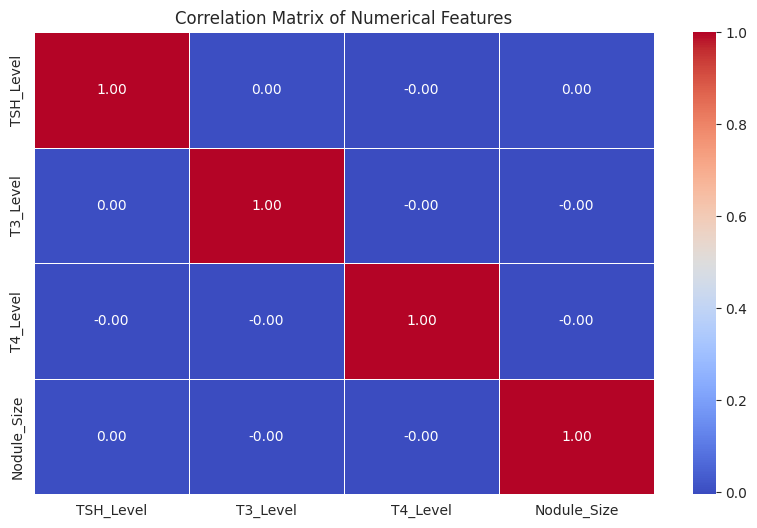

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [ ]:
# Pairplot for relationships among numerical features
#sns.pairplot(df[numerical_features + ['Thyroid_Cancer_Risk']], hue='Thyroid_Cancer_Risk', palette='husl')
#plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(212691, 17)

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Benign,163196
Malignant,49495


In [ ]:
#Convert categorical values to lowercase & remove whitespace:
df['Gender'] = df['Gender'].str.lower().str.strip()
#df['Gender']

In [ ]:
# Replace inconsistent categorical values:
df['Gender'] = df['Gender'].replace({'male': 'M', 'female': 'F'})

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_features = ['Gender']

# Apply Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numerical
    label_encoders[col] = le  # Store encoder for future use


In [ ]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,1,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,1,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,1,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,0,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,0,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
# Define mapping for ordinal encoding
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply mapping to convert categorical values to numbers
df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)
df['Thyroid_Cancer_Risk']

,Thyroid_Cancer_Risk
0,0
1,0
2,0
3,1
4,2
...,...
212686,0
212687,1
212688,1
212689,1


In [ ]:
binary_features = [ 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Obesity','Diabetes','Smoking']
# Replacing 'Yes' and 'No' with 1 and 0 in binary_features columns
for feature in binary_features:
    df[feature] = df[feature].replace({'Yes': 1, 'No': 0})
df[binary_features] = df[binary_features].astype(int)
df.head()

<ipython-input-22-2bb651b8a389>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].replace({'Yes': 1, 'No': 0})


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,1,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,Benign
1,2,29,1,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,Benign
2,3,86,1,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,Benign
3,4,75,0,India,Asian,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,Benign
4,5,35,0,Germany,African,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,Benign


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'Benign': 0, 'Malignant': 1})
df['Diagnosis']

<ipython-input-24-a717b126f46c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'Benign': 0, 'Malignant': 1})


,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
212686,0
212687,0
212688,0
212689,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Ensure column names in the drop method match the actual column names in the DataFrame
X = df.drop(columns=['Diagnosis', 'Ethnicity', 'Country', 'Patient_ID'])
Y = df['Diagnosis']  # Target variable

#print(X)
#print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((170152, 13), (42539, 13), (170152,), (42539,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_pred = model.predict(X_train)  # Predictions on training data
y_test_pred = model.predict(X_test)    # Predictions on testing data


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(Y_test, y_test_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
print(f"Testing Model Accuracy: {accuracy * 100:.2f}%")
print(f"Training Model Accuracy: {accuracy_train * 100:.2f}%")

Testing Model Accuracy: 82.56%
Training Model Accuracy: 82.78%


In [ ]:
print("Classification Report:\n", classification_report(Y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     32676
           1       0.69      0.44      0.54      9863

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


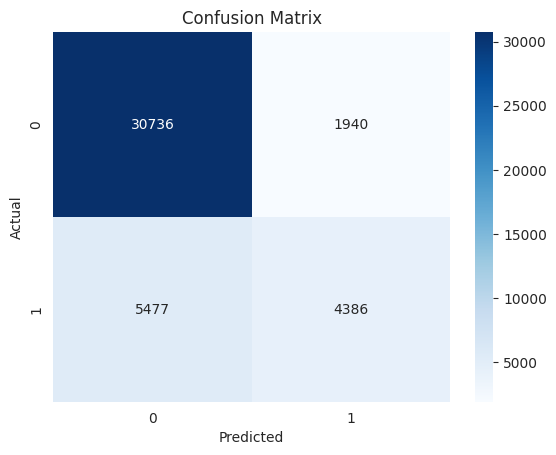

In [ ]:
cm=confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Using the tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(5, activation='relu', input_shape=(13,)),  # Input layer with 5 neurons
    layers.Dense(30, activation='relu'),  # first Hidden layer with 30 neurons
    layers.Dense(50, activation='relu'),  # second Hidden layer with 50 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           1,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, Y_train, epochs=2, batch_size=6, validation_data=(X_test, Y_test))

Epoch 1/2
28359/28359 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.8012 - loss: 0.4888 - val_accuracy: 0.8254 - val_loss: 0.4621
Epoch 2/2
28359/28359 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.8263 - loss: 0.4533 - val_accuracy: 0.7897 - val_loss: 0.4901


In [ ]:
loss,accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7868 - loss: 0.4935
Test Accuracy: 78.97%


In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)
print(predictions[:5])  # Show first 5 predictions

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions.flatten()})


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [ ]:
results_df.head()

,Actual,Predicted
189112,0,0
154042,0,0
89378,0,0
120547,0,0
152340,0,0
